In [51]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import  applications
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D,GlobalAveragePooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam

import warnings
warnings.filterwarnings('ignore')
import random
import logging
logger = tf.get_logger()
logger.setLevel(logging.ERROR)
import glob
import shutil
import os
import itertools
from sklearn.metrics import confusion_matrix ,classification_report
import joblib

In [52]:
train_path = "/home/bee110493/.config/JetBrains/DataSpell2021.3/projects/meal-recommender/app/fruits/train"
test_path = "/home/bee110493/.config/JetBrains/DataSpell2021.3/projects/meal-recommender/app/fruits/test"
val_path = "/home/bee110493/.config/JetBrains/DataSpell2021.3/projects/meal-recommender/app/fruits/validation"

In [53]:
IMG_SIZE = (100, 100)
train_images=tf.keras.preprocessing.image_dataset_from_directory(directory=train_path,image_size=IMG_SIZE,batch_size=10,shuffle=False)
test_images= tf.keras.preprocessing.image_dataset_from_directory(directory=test_path, image_size=IMG_SIZE,batch_size=10,shuffle=False)
val_images= tf.keras.preprocessing.image_dataset_from_directory(directory=val_path, image_size=IMG_SIZE,batch_size=10,shuffle=False)

Found 460 files belonging to 3 classes.
Found 130 files belonging to 3 classes.
Found 66 files belonging to 3 classes.


In [54]:
class_names = train_images.class_names
print(class_names)

['apple', 'banana', 'orange']


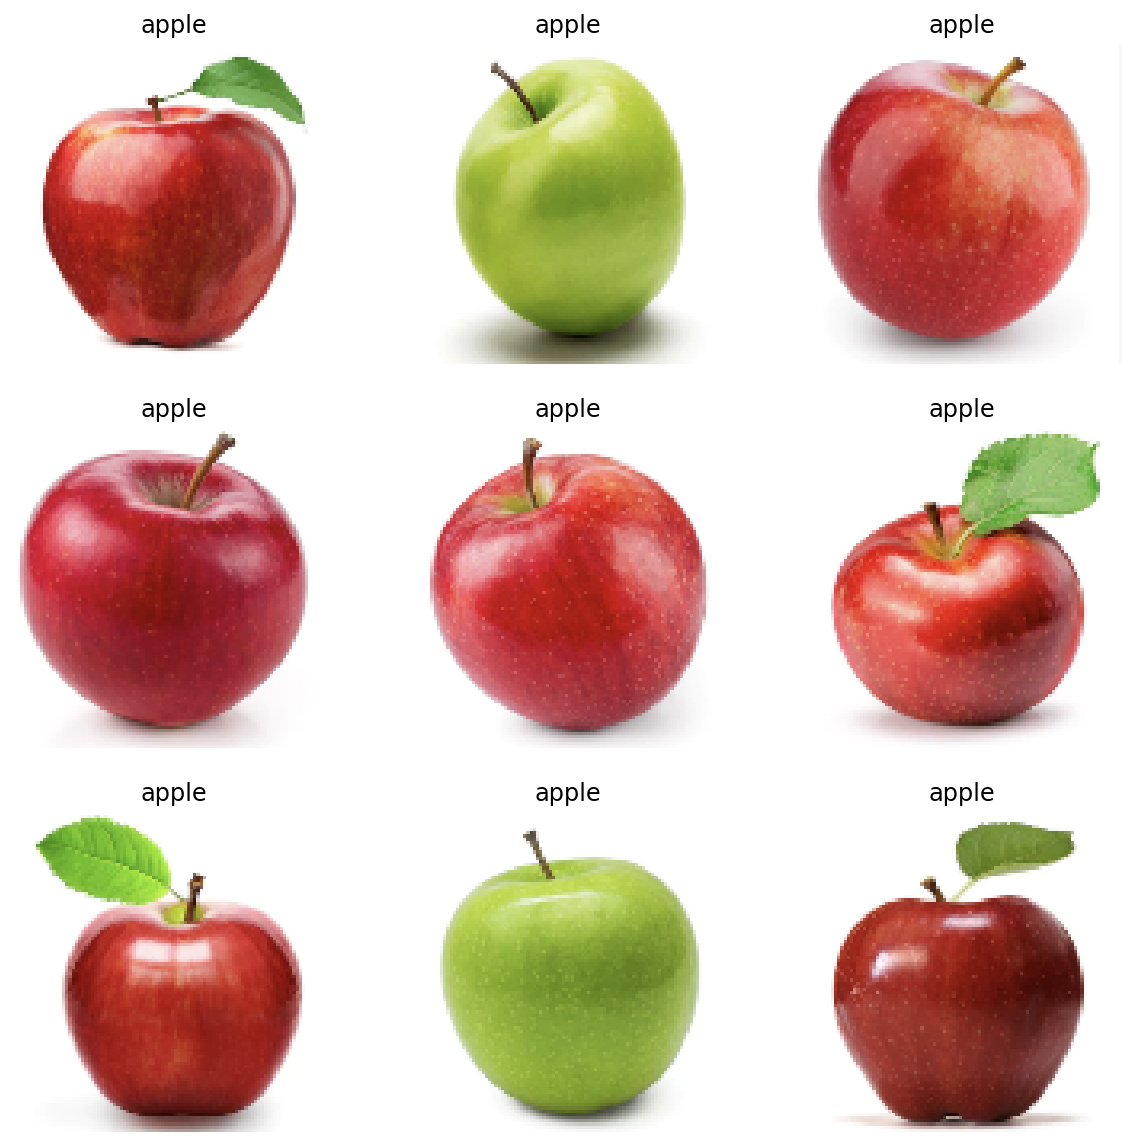

In [55]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_images.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [56]:
for image_batch, labels_batch in test_images:
    print(image_batch.shape)
    print(labels_batch.shape)
    break

(10, 100, 100, 3)
(10,)


In [57]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_images.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_images.cache().prefetch(buffer_size=AUTOTUNE)

In [58]:
model1 = Sequential([

    Conv2D(filters=32,kernel_size=(3,3),activation='relu',padding='same',input_shape=(100,100,3)),
    MaxPool2D(pool_size=(2,2),strides=2),
    Conv2D(filters=32,kernel_size=(3,3),activation='relu',padding='same'),
    MaxPool2D(pool_size=(2,2),strides=2),

    Flatten(),
    Dense(units=131,activation='softmax'),
])

In [59]:
model1.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 100, 100, 32)      896       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 50, 50, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 50, 50, 32)        9248      
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 25, 25, 32)       0         
 g2D)                                                            
                                                                 
 flatten_6 (Flatten)         (None, 20000)             0         
                                                                 
 dense_6 (Dense)             (None, 131)              

In [60]:
model1.compile(
    optimizer='adam',
    loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy'])

In [61]:
#model1.compile(optimizer=Adam(learning_rate=0.0001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [63]:
results=model1.fit(train_images,
                   validation_data=val_ds,
                   epochs=10)

Epoch 1/10
46/46 [==============================] - 6s 120ms/step - loss: 2.0086 - accuracy: 0.5174 - val_loss: 8.9491 - val_accuracy: 0.3182
Epoch 2/10
46/46 [==============================] - 5s 112ms/step - loss: 2.3834 - accuracy: 0.3348 - val_loss: 1.8183 - val_accuracy: 0.3788
Epoch 3/10
46/46 [==============================] - 5s 108ms/step - loss: 1.0818 - accuracy: 0.3783 - val_loss: 1.8123 - val_accuracy: 0.3788
Epoch 4/10
46/46 [==============================] - 4s 92ms/step - loss: 1.2012 - accuracy: 0.2978 - val_loss: 2.3512 - val_accuracy: 0.4697
Epoch 5/10
46/46 [==============================] - 5s 104ms/step - loss: 10.0936 - accuracy: 0.6804 - val_loss: 5.9231 - val_accuracy: 0.3182
Epoch 6/10
46/46 [==============================] - 5s 102ms/step - loss: 1.5696 - accuracy: 0.3870 - val_loss: 2.6061 - val_accuracy: 0.3636
Epoch 7/10
46/46 [==============================] - 5s 109ms/step - loss: 5.7192 - accuracy: 0.4630 - val_loss: 2.3647 - val_accuracy: 0.3030
Epoch 

In [ ]:
test_model, test_acc = model1.evaluate(test_images, verbose=2)
print('\nTest accuracy:', test_acc)

In [ ]:
probability_model = tf.keras.Sequential([model1,
                                         tf.keras.layers.Softmax()])

In [ ]:
predictions = probability_model.predict(test_images)

In [ ]:
joblib.dump(model1, 'model1.pkl')

In [ ]:
!ls